<a href="https://colab.research.google.com/github/MRIO/TheComputingBrain/blob/master/Project_1_DYI_Neuron_Model_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To be able to edit and use this Notebook:

0. Learn about how to use google colaboratory [video]()
1. in the file menu (top left), click ```open in playground```
3. still in the file menu, click ```save copy in drive```, to make your own personalized and editable copy of this file.
4. edit as you like. If something breaks irreparably, go back to step 1.

# Project 1: A DIY Neuron Model



### Previous Project:
In the previous project, you have learned that:
- individual ions lead to individual **equilibrium potentials** or **Nernst** potential.
- when different ion concentrations exist inside and outside the cell, the cells settles in a ***resting potential***, which is given by the weighted average of the different conductances.

### In this Project:
You will synthetize the **Hodgkin Huxley model of action potential** piece by piece. We will be building understanding as we present the components of the model along with with some simulated experiments (using the 'brian2' simulator), sample code and simple coding exercises. We begin by describing the **passive properties** of the membrane (leak and capacitance) then introduce the **active** components and the **voltage gated** ion channels. In the second part of the project we will examine the completed Hodgkin Huxley model and conduct some experiements using the model. 

Questions during the project are designed as self-evaluation (for you to test your own comprehension). If you have doubts about particular answers, ask your neighbor, your TA or your professor (in that order).

### The landmarks in the road map:

1. (Project 0) The electrical potential across membrane is due to differences in chemical concentration.
2. The concentration of chemicals is altered by flux of ions across the membrane via ion channels.
3. Membrane permeability to different ions varies as a function of the membrane potential (active channels).
4. Positive feedback creates an accelerating rise of positive currents due to sodium channels.
5. High membrane potential actives potassium channels (a negative feedback).
6. Spikes are due to the different time scales of ion permeability.

### The Hodgkin Huxley Model:
The origin of the action potential was a mystery to early neuroscientists when Hodgkin and Huxley proposed their model in 1952. Aided by the voltage clamp technique, and the persuasion that they could model the physics of the neuron as an electrical circuit, they set out to understand the mechanism underlying the generation of the action potential. In their [concluding paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/pdf/jphysiol01442-0106.pdf) in 1952, they formulated the mathematical framework most often used in computational neuroscience. Many fundamental building blocks in modelling excitable cells were laid down in this framework, which is of foundational importance to date.




# Key Terms


- **Permeability**. The tendency of an ion to cross the membrane. Plastic is 'impermeable to water'. Expressed as a propotionality. It is proportional to the number of open channels on the membrane for an ion. Commonly expressed as relative permeability of the ion channels compared to one another. 
- **Current, _I_**. A flow of electric charge. Measured in amperes (A).
- **Capacitance, _C_**. How well a material can *store* charge. Measured in farads (F).
- **Resistance, _R_**. A measure of the opposition to the flow of charge (current).  Measured in ohms (Ω).
- **Conductance, _G_**. The reciprocal of resistance (1/R), measures how easily the electricity flows through parts of the circuit for a given difference in voltage. Is an electrical property and is influenced by permeability. Measured in siemens (‎S‎ = $Ω^{-1} $)
- **Ion Channels**. Pores through the membrane that allow for selective permeability of different ion types. There are 'active' and 'passive' ion channels. Active channels change their conductance as a function of, for example, membrane potential. The conductance of passive channels is constant.
- **Voltage Clamp**. A method that creates a constant potential difference across the membrane and measures the current flowing through it.
- **Activation Gates**. Variables that represent the proportion of channels in a certain state (open or closed).



# Learning Objectives

After this project you'll be able to:
- Explain how **passive ion channels** and membrane properties lead to the **membrane time constant**.
- Explain what is the **driving force**.
- Differentiate between **active** and **passive** ion channels.
- Explain what is a **gating variable**.
- Compute the **steady state** of **voltage gating variables** in the current clamp.
- Explain the current flows across the cell as a function of maximal conductances and state of the gating variables.
- Explain **conductance** in your own words and why it is different for different ion types.
- Compute the currents entering the cell for different ion channels.
- Assemble the different ionic currents in the HH model to produce action potentials.

# Pre-requisites

Some suggested videos are here, but feel free to find your own. Also, if you find a video you love, you can contribute with the whole "computing brain" crowd via the computing brain channel!


- Ions and electrical charge (Ohm's law) : [video](https://www.youtube.com/watch?v=G3H5lKoWPpY) or [video](https://www.youtube.com/watch?v=fGI9d0CjI8s)
- Capacitance :  [video](https://youtu.be/f_MZNsEqyQw) or [video](https://www.youtube.com/watch?v=u-jigaMJT10)
- Clamps (current, voltage, conductance) [video](https://www.youtube.com/watch?v=5miWDVRcUUE)
- Basic understanding of the electrochemical gradient [video](https://www.youtube.com/watch?v=Ba02v7eoVWQ).
  

# Initialization Code

- In the code cell below we install the simulator [Brian2](https://brian2.readthedocs.io/) and import relevant python.modules.
- It installs and imports Brian2, the simulator we will be using.
- **Note that you have to run this every time that colab 'disconnects' from the kernel.**
- Documentation of brian2 can be found [here](https://brian2.readthedocs.io/en/stable/user/index.html)

In [0]:
# install brian2 
!pip install brian2

# import necesary packages
from IPython.display import display
from brian2 import * # our simulator of choice
import brian2.numpy_ as np # the numpy that comes bundled with it
from ipywidgets import interact, interactive # for some neat interactions
from IPython.display import display 
import ipywidgets as widgets
import matplotlib.pyplot as plt # for neat plots
import time # for time basis conversions

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 5.6MB 19.5MB/s 
  Created wheel for brian2: filename=Brian2-2.3-cp36-cp36m-linux_x86_64.whl size=1283410 sha256=44106e34a566ea56911eebf0e94f5a6af6b4932f2b29548160082a1b72f98faa
  Stored in directory: /root/.cache/pip/wheels/d0/53/ca/54953abc5f741ebd69a87da3b87f3630c5073d26d2d4426cc9
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


# The Passive Membrane

## Differences of Potential Due to Differences in Ion Concentration

As we learned in the previous project, fatty membrane separating the outside and the inside. Insert some  negatively charged ions and molecules inside (such as Chloride or other anionic proteins). If this compartment is placed in a more positively charged environment, there's a negative difference of potential across the membrane.

**The membrane is not perfectly permeable**. There are ion channels in the membrane through which ions can cross. Nature likes an equilibrium, and in principle ions would flow out of the membrane until charge balance is achieved.  However, some ions are too large to get across the membrane, thus they get stuck inside, keeping that charge in the cell. Many proteins inside the cell fit that description, and that makes it so that the inside of the cell is negatively charged. How negative? That's a function of how much charge per volume (charge density) there is. The thing to remember is that even if all channels in the membrane are open, the cell would still remain at a negative potential, the so called 'resting potential', also known as $V_{rest}$.

The smaller the ion, the more charge can be packed in a volume. Also, in general there are more ions than ion channels, and so it takes time until these ions can find a channel to leak through, until it comes back to the resting membrane potential.

We can calculate this rate of decay via the **passive properties** of the membrane, the **capacitance** and the **leak conductance**.




### The Driving Force


The same way as a ball on a hill has potential energy proportional to the height of the hill, the membrane that is taken away from $V_{rest}$ has a potential called the **driving force**.


---


$$V - V_{rest}$$


---


The farther from $V_{rest}$, the higher the potential, and the willingness of the potential to return to its equilibrium state.

Two parameters determine the rate with which the membrane returns to the resting potential, the **membrane capacitance** ($C_{membrane}$, measured in Fahrads) and the **leak resistance** ($R_{leak}$, measured in Siemens, the reciprocal of Ohm). While the leak resistance relates to the number of pores for ions to cross (only those that are permeable), capacitance is equivalent to the maximum charge that the cell membrane can store and is relatively constant for most cells.

### Charge Loss Due to Leak Conductance and Capacitance



  When ions cross the membrane through pores (ion channels) we speak of a **current leak**. The **leak conductance** is a measure of how permeable the membrane is to ions, or, in other words, the number of **passive ion channels** and how many ions can cross over time (recall that charge flow is current).
 
The membrane potential change per unit time is represented by ($\frac{dv}{dt}$), or equivalently $\dot{V}$, and is an ordinary differential equation. In the absence of any other influences, $V$ tends to $V_{rest}$ (in millivolts (mV)), with a rate determined by the leak conductance. A **conductance** is a measure of the number of leak channels available for the crossing of ions. 

---


$$ \dot V = \frac{1}{R_{leak}}(V-V_{rest}) $$

is the same as 

$$ \Leftrightarrow \dot{V} =  g_{leak}(V-V_{rest})$$


---

Through passive ion channels, the charge leaks out of the neuron until the electrochemical equilibrium, i.e., the resting potential is reached. That is, the driving force gets smaller and smaller until zero. The conductance determines the rate of the return to equilbrium (resting potential).


Furthermore, cell membranes have [**capacitance**](https://www.youtube.com/watch?v=G3H5lKoWPpY), which is a measurement of how much charge it can store (review the video on capacitance). The thicker a membrane, the higher the membrane capacitance $C_m$. **The capacitance dampens a current flow**, reducing the rate of change of the membrane potential. The lower the capacitance, the faster the potential difference comes to the resting potential. 
 
---

$$\dot{V} =  \frac{g_{leak}(V-V_{rest})}{C_{m} }$$


or by using leak resistance instead of conductance,



$$\dot{V} =  \frac{(V-V_{rest})}{R_{leak} C_{m} }$$

---


The denominator of the second equation $R_{leak}C_m$ is often substituted by $\tau_m$, the so called **time constant** for reasons that will become clear below.


#### Simulation: Voltage Clamp of the Passive Membrane (Interactive)

How fast do we get to the resting membrane potential if we only have passive elements in the membrane (leak ion channels and capacitance)?

To see how capacitance and resistance influence the passive decay time of the membrane potential back to resting potential, we create a mini simulator where we can give a voltage step ('clamp') and see how changes of $C_m$ and $g_{leak}$ change the slope of the decay. 

In [0]:
start_scope() # don't worry about this line for now (it informs brian2 to reset workspace variables)

def PassiveMembrane(C_m, g_leak, v_init):
    # this is a function that computes the membrane potential over time 
    # for a given capacitance and leak conductance

    E_leak = -70.6 * mV     # We define the reversal potential as a constant (typical value for HH)
    dtt = 0.025*msecond     # simulation parameters (integration time)
    g_leak = g_leak* nS     # attribute unit [nS] to function argument g_leak
    Cm = C_m * pF           # attribute unit [pF] to function argument C_m

    # Here we define our model of the passive membrane in Brian2
    # note 1: for Brian, the equations are defined as a string, 
    #         that's why you see the equation surrounded by ''' 
    # note 2: the unit of the variable is mandatory and specified
    #          in the string.

    eqs ='''
    dv/dt = g_leak *(E_leak - v) /Cm: volt
    '''
    
    # with Brian2 we create a neuron group G with 1 neuron and equations defined above
    G = NeuronGroup(1,eqs, 'euler') 
    
    # we introduce a StateMonitor in G to record 'v'
    M = StateMonitor(G, 'v', record=0)
    
    # we set an initial value for membrane potential (G.v) 
    G.v = E_leak # initial condition
    
    #we run the model for 50ms without input
    run(50*ms)
    
    # VOLTAGE CLAMP:
    # here we set the initial voltage value (we 'clamp the voltage to a constant')
    G.v = v_init*mV # injected current: note that the unit is mandatory!
    
    # and let the membrane potential 'relax', that is, 
    # we run 50ms more of simulation, to see the difference in decay time
    # due to the change of voltage.
    run(50*ms)

    # finally, the function Mem_func is able to plot its output.
    axes = plt.gca()
 
    plt.plot(M.t/ms, M.v[0]/mV)
    plt.xlabel('Time (ms)')
    plt.ylabel('V (mV)')

    return E_leak

# change the values and see what happens! 
w = interactive(PassiveMembrane, g_leak=(10.0,500.0), C_m=(10.0,500.0), v_init=(-90, 0));

#w.children
display(w)

MagicError: ignored

#### Questions:
1. What is the **time scale** of the decay due to passive properties of the membrane? 

2. What is the influence of capacitance on decay time to resting potential?

3. What is the relationship between leak conductance and capacitance on decay dynamics?


#### Answers:
1. Judging by the time for the voltage to decay to baseline in the plots above, the time scale of the decay is about 10's of milliseconds.

2. The larger the capacitance, the slower the decay. This makes sense, as capacitance is a measure of 'charge storage capacity'.

3. They are reciprocal of each other.


# The Excitable Membrane

### Active Ion Channels

**Active Channels are those where ion permeability changes as a function of something, usually voltage** or some chemical. In contrast, passive channels such as the **leak** have constant conductance. Active essentially means that the state of the channels changes as a function of some other variable, such as the membrane potential.

### Ion Selectivity 
Channels can be more or less **selective** for particular ions, and we generally name the current that is due to a certain ion channel with the name of it's preferred ion. For example, Sodium ions go through the **Sodium channel** and become the **Sodium Current**.

Other channel types exist that are less selective, and have currents  due to multiple kinds of ions, with prominent examples being the Sodium/Potassium pump and the **NMDA** receptor, which exchanges both Calcium and Magnesium.

### Currents

The current that crosses the membrane is a function of the number of permeable ion channels available at the membrane at a given time. For example, **the Sodium current ($I_{Na}$) is the total amount of current that is due to the flow of Sodium ions through the sodium channels**. The current is determined by the multiplication between the **maxiumum conductance**, the **gating variables** representing the proportion of open ($m$) and active ($h$) chanels and the **driving force**.


The following paragraphs define **gating variables**, their effect on permeability and how they change over time, i.e., their dynamics.

### Gating Variables



Installed in the membrane are large numbers of active ion channels (varying from tens to tens of thousands). Many ion channels are rather selective. Ion channels can be open or closed state. The ion channels are statistically independent of each other. 

From these assumptions, we can represent the state of active ion channels via **gating variables, which represent the proportion of channels that are open or closed** (or sometimes 'activated and inactivated'). As they are a **proportion** of open channels of all available channels, they take values from 0 (no channels opened) to 1 (all channels opened).

(If we have 100,000 channels, and 80,000 are currently open, then gating variable $x$ has value 0.8, that is 80% of the channels are open).

Each channel opens and closes probabilistically and independently ([see explanation on [single channel patch clamp](our video). The probability of opening and closing is a function of the context, which could be, for example, the momentary membrane potential of the cell. When there are large numbers of channels, this probability of the single channel can be taken as the proportion of channels open. For example, for a given membrane potential $V$, the **proportion of  channels in an open state** is given by a function of activation gate $m_{\infty}$ (a **gating variable**):

<img src="https://i.postimg.cc/h4TDpRN2/m-inf.png" width="350x">

In this figure we have the experimentally measured proportion of open channels, i.e., the *steady state* of the **gating variable** (the error bars represent the outcoume of multiple experiments).

#### Comprehension Questions:

1. Analyze the graph above and determine what is the potential at which all channels are closed?
1. What is the difference between an active and a passive ion channel?
1. What is a gating variable?
1. What is selectivity?

### Activation and Inactivation Gates



Note that there can be more than one gating variable per channel type, depending on the mechanisms of the ion channel. For example, the Sodium ion channel has two gates, the **activation gate** $m$ and the **inactivation gate** $h$. 

The flow of sodium through all channels (permeability)  is dependent on both these gating variables. As m and h represent proportion, they can also be thought of as probabilities. Hence, the probability of an ion channel being permeable is their multiplication.

----

$$p = m^a h^b$$

----

The exponents $a$ and $b$ are also related to the mechanical action of the ion channel, essentially expressing the number of  activation gates (a) and inactivation gates (b) (for a more in-depth explanation consult chapter 2 of Dynamical Systems in neuroscience, or Aaron).

### Sample Code: Plotting a function with python

An arbitrary **activation function** $x$ takes from 0 to 1 as a function of V. It is commonly represented by a sigmoid function [$x_{inf}$, a ](https://en.wikipedia.org/wiki/Sigmoid_function) such as the one below. 

---

$$x_{\infty}(V) = \frac{1}{1+e^{(V_{1/2}-V)/k}}$$

---
This type of function is often used to model the **steady state** (represented by the $\infty$ subscript) of the activation gate, because it is symmetrical, rises smoothly and can be parameterized to match experimental data.

The function takes two parameters, $V_{1/2}$ and $k$ ($V_{1/2}$ defines the position of the midpoint of the sigmoid, and k defines the slope, see figure). These parameters are obtained experimentally via patch clamp experiments. For example, the activation variable $m_{\infty}$ of the squid axon, we have that $V_{1/2} = -40, k = 15$.


The parameters determine the shape of the function, as such:

[![boltzmann-function.png](https://i.postimg.cc/Tw2b5MsG/boltzmann-function.png)](https://postimg.cc/R38h289b)

The python code below defines and plots a mathematical function, in this case, the Boltzmann function.



Text(0, 0.5, '$m_{\\infty}(V)$')

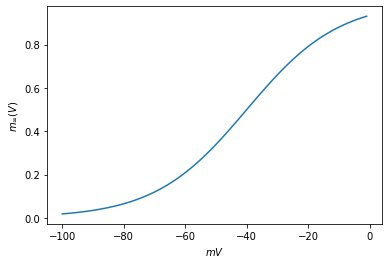

In [0]:
# define a function m_inf that returns the
# steady state of m gate for any value of the potential V.

def sigmoid(v_at_half, k, V):
    
    #np.exp means we are using the function exp from the package numpy
    return (1./(1.+np.exp((v_at_half-V)/k)))

# define a voltage range for calculating the function
v = np.arange(-100.0, 0.0, 1.) # from -100 to 0mV at steps of 1mV

m_inf = sigmoid(-40,15, v)

plt.figure(1) # create a figure

plt.plot(v, m_inf) # plot the range x vs the function tau(x) domain 
plt.xlabel(r'$mV$') # add labels to the plot
plt.ylabel(r'$m_{\infty}(V)$') 

##### Comprehension Question:

- Do  you have an intuition why a sigmoid function is used to represent gating variables?)


### Activation Time Constants

When the membrane potential changes, the opening and closing of channels **is not instantaneous**. The gating variable tends to the steady state that is dependent on  voltage (see plot under gating variables) with a rate proportional to $\tau_x$, which is also voltage dependent. In other words, to determine this rate of change (from open to close or vice-versa) we can measure $\tau_x$. 
Note that $\tau_x$ is the time constant for the rate of change of gating variables and is different from the membrane time constant.

![tau-m.png](https://i.postimg.cc/FFZq9PS9/tau-m.png)

The function that determines the rate of change of m is given by

---

$\tau_x(V) = C_{base} + C_{amp}  e^\frac{-(V_{max}-V)^2}{\sigma^2}$

---


#### Code Exercise: Plot the function for $\tau_m(V)$

Using the sample code above, plot the function defined above.

Where $C_{base}, C_{amp}, V_{max}, \sigma$ are given parameters (see below).

[![gaussian.png](https://i.postimg.cc/XJFf9SKz/gaussian.png)](https://postimg.cc/JDrHWF2N)

Text(0, 0.5, 'tau_m (ms)')

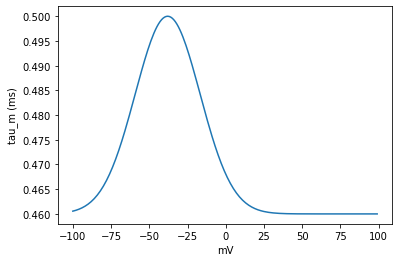

In [0]:
# define a function tau that returns tau for any V and given parameters
# 
# use C_base = 1.1, C_amp = 4.7, V_max = -79, sig = 50

# taum  =  .46*ms +.04*exp(-(-38*mV-v)/( 30*mV)**@) *ms : second
# tauh  =  7.4*ms +1.2*exp(-(-67*mV-v)/( 20*mV)**2) *ms : second

def tau(V, C_base, C_amp, V_max, sig):    
    return C_base +C_amp*np.exp(-(V_max-v)**2/sig**2)
    ### Return value of funciton
     

# define a voltage range for calculating the function
v = np.arange(-100.0, 100.0, 1) # from -100 to 0mV at steps of 1mV

plt.figure(1) # create a figure
plt.plot(v, tau(v, .46, .04, -38., 30.)) # plot the range x vs the function tau(x) domain 
# plt.plot(v, tau(v, 7.4, 1.2, -67, 20.)) # plot the range x vs the function tau(x) domain 
plt.xlabel('mV') # add labels to the plot
plt.ylabel('tau_m (ms)')

### Maximal conductance ($\bar{g}$)


While the gating variable stands for the proportion of channels open, the maximum conductance $\bar{g}$ represents the total number of channels available for a certain ionic current. 

The leak resistance is a passive conductance: the leak channels have a constant permeability, which is directly a function of how many channels are available. 

Active ion channels have a contribution to the membrane potential, which is dependent on the equilibrium potential for the ions for which the channel is selective. For the sodium ion channel for example, we talk about a driving force of sodium.



### Permeability of the Sodium Ion Channel 

Now we can write the  conductance of sodium ion as a function of its activation and inactivation gates m and h:

$$
g_{Na}=\bar{g}_{Na}m^3h 
$$

Where $\bar{g}_Na$ is the maxiumum conductance, $m$ is an activation gate, and $h$ is an inactivation gate. Essentially, if all channels are open $(m=1)$ and de-inactivated $(h=1)$, we have that the conductance is maximal.

Any voltage-gated ion channel can be formalized in this way (like potassium for example). Where $m$ and $h$ are raised to powers $a$ and $b$ respectively. Thus, conductances are different for each ion type.

$$
g_i = \bar{g_i} m^a h^b 
$$


The letter *m* is the probability of the activation gate to be open and *h* the probability of the inactivation gate to be open. Their powers $a=3$ and $b=1$, respectively are the number of (in)activation gates in the Sodium channel. This figure represents the situation:



[![sodium-channel.png](https://i.postimg.cc/Gh7HXSR9/sodium-channel.png)](https://postimg.cc/cr3xHhrN)




#### Comprehension Question:
- What is the difference between the membrane time constant and the time constant for the ion channel gating variables?
- How does inactivated channels differ from closed channels? 


### Dynamics of Sodium gating variables

Gating variables in general take values from 0 (impermeable) to 1 (permeable). Changes in the membrane potential lead to changes in the proportion of channels open or inactivated. 


- partially activated $(0<m<1)$
- completely activated $(m=1)$
- deactivated $(m=0)$
- inactivated $(h=0)$
- deinactivated$(h=1)$

The change in state (for m or h) is given by a differential equation that is a function of $V$. Note that it is very similar to the one for the dynamics of the membrane potential of passive membranes.

---

$$
\dot m = \frac{m_\infty(V) - m}{\tau_m(V)}
$$

---

where $m_{\infty}$ is the steady state  activation or inactivation (the equilibrium) and $\tau(V)$ is the activation or inactivation time constant (a measure of the time to reach a steady state, or the speed). 

Think of $m_\infty$ as the value that is inevitably obtained as we keep the membrane potential fixed for a very long times (i.e., infinity). 

$k$ is just a factor that determines the steepness of the slope, the smaller $k$ is, the steeper $m_\infty(V)$ is.

$h$ is described by an equivalent equation:

---

$$
\dot h = \frac{h_\infty(V) - h}{\tau_h(V)}
$$

---




#### Exercises:

1. Given the specific parameters for the activation gates plot the steady state activation functions and time constants for each of the ions.
  - here we give the parameters for all of the taus and act gates

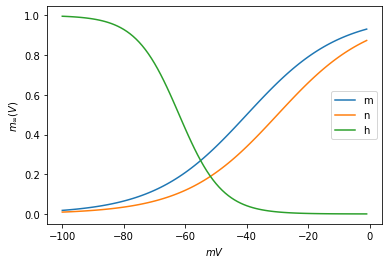

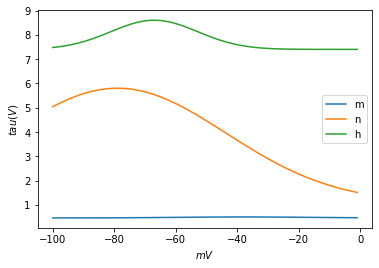

In [0]:
def sigmoid(v_at_half, k, V):
  return (1./(1.+np.exp((v_at_half-V)/k)))

def tau(C_base, C_amp, V_max, sig, V):    
    return C_base +C_amp*np.exp(-(V_max-v)**2/sig**2)

v = np.arange(-100.0, 0.0, 1.)

m_inf =  sigmoid(-40, 15, v)
h_inf =  sigmoid(-62, -7, v)
n_inf = sigmoid(-30, 15, v)

tau_m = tau(0.46, 0.04, -38, 30, v)
tau_h = tau(7.4, 1.2, -67, 20, v)
tau_n = tau(1.1, 4.7, -79, 50, v)


plt.figure(1)
plt.plot(v, m_inf, label= 'm') 
plt.plot(v, n_inf, label= 'n')
plt.plot(v, h_inf, label= 'h')
plt.xlabel('$mV$') 
plt.ylabel('$m_{\infty}(V)$')
legend();

     
plt.figure(2)
plt.plot(v, tau_m, label= 'm') 
plt.plot(v, tau_n, label= 'n')
plt.plot(v, tau_h, label= 'h')
plt.xlabel('$mV$') 
plt.ylabel('$tau(V)$')
legend();


2. In this example we will plot the dynamics of **INDIVIDUAL** activation variables  after a change of membrane potential. We assume an initial membrane potential of V=-80mV is held for 100ms, and then instantaneously changed it to a new holding potential of V=0mV. 

In [0]:
# define parameters
V0 = -80 #  mV
T1 = 100 #ms
V1 = 0 # mV
  
def m_inf(V)
  return sigmoid(-40, 15, V)

def tau_m(V) 
  return tau(0.46, 0.04, -38, 30, V)

# step the dynamics
def step_dyn(m, V, deltat):
  minf = m_inf(V)
  taum = tau_m(V)
  dmdt = (minf - m)/ taum
  m = deltat * ( (m_inf - m)/taum )
  return m

deltat = 1 #ms
for t in range(0,200):
  if t < 100:
    V = -80
  elif t >= 100:
    V = 0
  m = step_dyn(m, m_inf, deltat)


figure(1)
plt.plot(t/deltat, m) 
xlabel('Time (ms)')
ylabel('m')


NameError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
# Pseudo Brian2

eqs = '''
  dmdt = (m_inf-m)/taum*dt
  m_inf = ...
  taum = ...
  '''

N = Neurongroup(1, eqs)

M = StateMonitor(N,...)


N.V = -80

N.run(100)

N.V = 0
N.run(100)


### The Sodium Current Enters the Scene

Now we have all the ingredients to understand how the gating variables and the conductance become the sodium current. The current flow to the cell for a given set of ion channels is determined by three elements, the equilibrium potential for the ions, the total number of channels times the single conductance and finally, the gating variables, representing the proportion of open channels.



$I_{Na} = g_{Na} m^3 h (v-E_{Na})$

#### Sample Code: Voltage Activated Ion Channels

Let's first see what happens when we insert an active Sodium ion channel in our model of the membrane. 

### Simulating the Sodium Current

In [0]:
start_scope()

# Reversal Potentials
E_leak = -70.6 * mV
E_Na = 50*mV

# Conductances
g_leak =  400 * nS ## attention to units!
g_Na = 30.0 * uS ## attention to units!

# Membrane Capacitance
Cm = 281 * pF

# define our differential equations
eqs_V ='''
dv/dt = (I - I_Na )/Cm : volt
'''
# dv/dt = (I - I_leak - I_Na )/Cm : volt

eqs_I = '''
I_leak = g_leak * (v- E_leak) : amp
I_Na = g_Na*(m*m*m)*h*(v-E_Na) : amp
I : amp
'''

eqs_activation= '''
m_inf =  1/(1+exp((-40*mV -v)/(15*mV))) : 1
h_inf =  1/(1+exp((-62*mV -v)/(-7*mV))) : 1
taum  =  .46*ms + .04*exp(-(-38*mV-v)**2/(30*mV)**2) *ms : second
tauh  =  7.4*ms + 1.2*exp(-(-67*mV-v)**2/(20*mV)**2) *ms : second
dm/dt = (m_inf - m)/taum : 1
dh/dt = (h_inf - h)/tauh : 1
'''

eqs = eqs_V
eqs += eqs_I
eqs += eqs_activation

G = NeuronGroup(1,eqs, 'euler', dt=0.025*ms)

M = StateMonitor(G, ['v','m','h'], record=0)

## Run the simulation starting from a hyperpolarized potential.
G.v = E_leak
G.I = 0*nA
G.h = 1 # start with deinactivated channels
run(100*ms)


WARNING    "v" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value array([-100.,  -99.,  -98., ...,   -3.,   -2.,   -1.]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


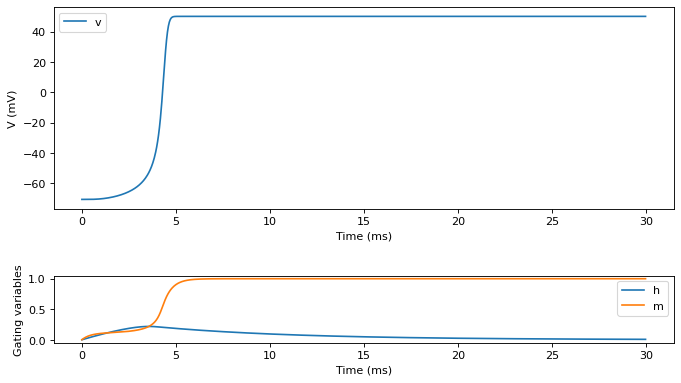

In [0]:
# Plot results

# prepare a grid to plot graphs  (like function subplot in matlab)
grid = plt.GridSpec(5, 1, wspace=0.4, hspace=1)

# create figure
figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

# in the first viewport plot membrane potential vs time
subplot(grid[:2, 0])
plot(M.t/ms, M.v[0]/mV, label='v')
xlabel('Time (ms)')
ylabel('V (mV)')
legend();

# plot the activation variables
subplot(grid[2, 0])
plot(M.t/ms, M.h[0], label='h')
plot(M.t/ms, M.m[0], label='m')
xlabel('Time (ms)')
ylabel('Gating variables')
legend();

show()

#### Questions: 
- Why does the membrane potential saturate?
- Was there a leak current in this model (read the equations!)?
- At the end of the experiment is the channel active or inactive? Which state variable represents that fact?
- At the end of the experiment is the channel open or closed? Which state variable represents that fact?

#### Answers: 
- The only effective current is the Na current in the current model because of that the membrane potential saturates when the sodium equilibrium potential is reached.
- The leak current wasn't included.
- Inactive
- Open

## Attempt!
# **The Potassium Channel**

The potassium **current** can be expressed by the following equation:

----


$$ I_k = g_{K} (V - E_k)$$ 


----

where $E_k$ is the potassium reversal potential and ${g}_{K}$ is the conductance of potassium ions. The **conductance** of potassium, which is voltage and time dependent, can be expressed in terms of its gating (activation) variable $n$, or to put it in other words, it can be expressed in terms of the proportion of activated channels.



$$
g_{K}=\bar{g}_{K}n^4
$$


where $\bar{g}_{K}$ is the maximum conductance, and $n$ is the activation variable. Just like $m$ and $h$ variables, variable $n$ follows the sigmoid fuction. 



$$ \frac{dn}{dt} = \dot{n} = \frac{n_{\infty}(V) - n}{\tau_n} 
$$


where $n$ approaches the target value of $n_\infty(V)$ with a time constant $\tau_n$. The change of time constant $\tau_n$ as a function of voltage can be expressed as:



$$
\tau_n(V) = 1.1 + 4.7  e^\frac{-(-79-V)}{(50)^2}
$$



We can now add these equations to the model.

----

### Code Exercise: The Potassium Ion Channel

Add a potassium current to the model (note that its activation variable is $n$). Add the following parameters and definitions to the equations following the same syntax as for the Sodium Ion channel. Beware of unit definitions!

----

$ I_k = \bar{g}_K n^4 (V - E_k)$

$ \frac{dn}{dt} = \dot{n} = \frac{n_{\infty}(V) - n}{\tau_n} $

$\tau_n(V) = 1.1 + 4.7  e^\frac{-(-79-V)}{(50)^2}$

$ n_\infty(V) = \frac{1}{1+e^{(-53-V)/15}} $

$ \bar{g}_K = 12 \mu S$

----



In [0]:
 start_scope()

# Reversal Potentials
E_leak = -70.6 * mV
E_Na = 50 * mV
E_K = 40 * mV

# Conductances
## attention to UNITS! For instance nS << uS
g_leak =  400 * nS 
g_Na = 30.0 * uS 
g_K = 12.0 * uS ## 
# Membrane Capacitance
Cm = 281 * pF

# here we define our master differential equation. Note that I_k is already here.
eqs_V ='''
dv/dt = (-I_leak - I_Na - I_K - I)/Cm : volt
'''

# here we add a definition for the potassium current I_K
eqs_I = '''
I_leak = g_leak * (v - E_leak) : amp
I_Na = g_Na*(m*m*m)*h*(v - E_Na) : amp
I_K = g_K*(n*n*n*n)*(v - E_K) : amp
I : amp
'''
# here you add the equations defining the potassium activation gates
eqs_activation= '''
n_inf =  1/(1+exp((-40*mV -v)/(15*mV))) : 1
m_inf =  1/(1+exp((-40*mV -v)/(15*mV))) : 1 ***********
h_inf =  1/(1+exp((-62*mV -v)/(-7*mV))) : 1
taum  =  .46*ms + .04*exp(-(-38*mV-v)**2/(30*mV)**2) *ms : second
tauh  =  7.4*ms + 1.2*exp(-(-67*mV-v)**2/(20*mV)**2) *ms : second
taun  =  1.1*ms + 4.7*exp(-(-79*mV-v)**2/(50*mV)**2) *ms : second
dm/dt = (m_inf - m)/taum : 1
dh/dt = (h_inf - h)/tauh : 1
dn/dt = (n_inf - n)/taun : 1
'''

# 1/((0.01*((10*mV-v)/exp(10*mV-v)/10)-1) + 0.125 * exp(-v/80*mV) )*ms : second

# notice that we simply "concatenate" the strings with all equations
# ( with the operator+=).
eqs = eqs_V
eqs += eqs_I
eqs += eqs_activation

G = NeuronGroup(1,eqs, 'euler', dt=0.025*ms)

M = StateMonitor(G, ['v','m','h','n'], record=0)

## Run an experiment 
G.I = 0*nA
run(200*ms)

WARNING    "v" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value array([-100.,  -99.,  -98., ...,   97.,   98.,   99.]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


## All the currents

To summarize the model: According to the Kirchhoff’s law, the total electrical current $I$ flowing across the membrane may be divided into the capacitive current $I_C$, plus all the ionic currents. As we have already discussed, we consider three types of ion channels in this model: the sodium channel ($I_{Na}$), the potassium channel ($I_{K}$), and unspecified passive leakage  ($I_{L}$). 

Thus we arrive at the final equation defining the model (also called the 'master equation'):

----

$$ 
I = I_C + I_{Na}+ I_K + I_L
$$


----

$I_C$, or the capacitive current equals 

$$
I_C = C_m \frac{dV}{dt}
$$

or 


$$
I_C = C_m \dot{V}
$$

where $C_m$ is the membrane capacitance and $\dot{V}$ is the change of voltage across the membrane as a function of time. Therefore, we can express the change of voltage accross the membrane by the following equation:

----

$$ 
\dot{V} = \frac{I - I_{Na}- I_K - I_L}{C_m}
$$

or

$$ 
  \dot{V} = \frac{I - \bar{g}_{Na} m^3 h (V -E_{Na}) - \bar{g}_{K} n^4 (V - E_k) - g_L (V - E_L)} {C_m}
$$


----


We will be using this equation in our subsequent code.

### Summary of Mechanisms:

After installing sodium and potassium channels we effectively complete the HH model. These are the principal mechanisms in operation:

- Sodium channel induces depolarization via positive feedback (m grows with V)
- Leak brings the cell back to its resting potential (V-Vrest)
- Positive membrane potential induces the inactivation of Sodium (h tends to 0)
- Potassium induces hyperpolarization after the spike (n tends to 1)

These are tempered by the capacitance, which defines how fast the ionic mechanisms contribute to the effective membrane potential.



Text(0, 0.5, 'V (mV)')

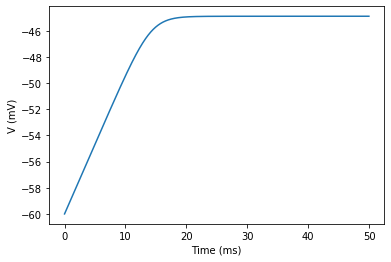

In [0]:
start_scope()
# define parameters
dtt = 0.025*msecond

# Reversal Potentials
E_leak = -70.6 * mV
E_K = -90 * mV
E_Na = 50*mV

# Conductances
g_leak = 30 * nS
g_K = 6.0 * nS
g_Na = 40.0 * uS

# Membrane Capacitance
Cm = 281 * pF
VT = -50.4 * mV

# define differential equations
eqs_V ='''
dv/dt = (I_Na - I_K + I)/Cm : volt
'''

eqs_I = '''
I_leak = g_leak * (E_leak - v) : amp
I_K = g_K*(n*n*n*n)*(v-E_K) : amp
I_Na = g_Na*(m*m*m)*h*(v-E_Na) : amp
I : amp
'''

eqs_activation= '''
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1    
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
'''

eqs = eqs_V
eqs += eqs_I
eqs += eqs_activation


G = NeuronGroup(1,eqs, 'euler', dt=dtt)
G.v = -60*mV
G.I = 0.3*nA

M = StateMonitor(G, 'v', record=0)


run(50*ms)
# G.I = 0.3*nA
# run(10*ms)
# G.I = 0*nA
# run(35*ms)

plt.gca()
plt.plot(M.t/ms, M.v[0]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')


#### Comprehension Question:
- What would be the dynamics of a cell that has solely Sodium and leak ion channels?
- What if the cell only possessed Potassium and Leak ion channels?


# The First Model of the Action Potential


### The Hodgkin Huxley Model

Embodying most of these facts is the **Hodgkin Huxley model** —a **single compartment model** of the giant squid axon — where the **spike generation** is a due to **voltage mediated** **interactions between multiple ion channels** which can lead current out or in the cell, that is, had time and voltage dependence, i.e., **active conductances**. 

The **HH is a four dimensional model** where the momentary membrane potential ($V_m$) depends on the state variables (m, h, n) describing the different states of the ion channels (e.g., activation and inactivation variables). The evolution of the state variables are represented by differential equations.

### A spike is the product of an imbalance of the current flux

There are **two essential components** for the **action potential generation**: a negative feedback which reduces the membrane potential when it’s high (voltage activated potassium) — i.e., hyperpolarizes the membrane when it’s depolarized, and a positive feedback which increases the membrane potential when it’s increased, based on voltage sensitive sodium channels. Spikes appear due to the imbalance/disequilibrium in conductances and their time courses. 

The time courses and contributions to the membrane potential of the ion channels  are very different: **potassium and sodium de-inactivation are slow** (slow time constant) and while **sodium activates very quickly**. 

In what follows we will be running experiments to build intuition about how activation variables and membrane potential interact under different stimulation conditions.

---

 **Here's an analogy:**. In a house, the number of open windows and air conditioners has to do with the difference between outside and inside temperature, and the temperature preference of people inside the house, **Na**dia, **K**onrad and **Cl**aire.
 
- **Na**dia likes it hot and when the temperature picks up she starts to dance, increasing the temperature in the room. 

- The hotter **Na**dia gets, the more windows Konrad opens, but that takes time (tau), so the temperature increases faster than Konrad manages to open windows. 

- But then **Na**dia overheats (spikes) and has to rest for a while (inactivated state). **K**onrad gets activated when he sees that Nadia is dancing, so when she starts to franctically dance, he opens the windows. 

- Because **Cl**aire likes it cold, she always has an air conditioning on, so temperature is always going lower (heat is constantly leaking at a steady rate).


---

# Comprehension Quiz and Further Exercises

## Passive Membrane Properties
- What is 'ion channel permeability'?
- How is capacitance like friction?
- How is the driving force like a spring?
- Explain conductance in your own words and why it is different for different ion types.

## Active Channels and Gating variables
- What are gating variables? What gating variables exist in the typical sodium channel?
- When is h at its maximum, at small or large voltages? 
- When is m at its maximum, at small or large voltages?
- What is the unit of g * V_rest?
- [take this online quiz](https://www.physiologyweb.com/daily_quiz/physiology_quiz_QBTakR5k4CTyBTLXoKGaSzdZ1bz2N7cq_neuronal_action_potential.html
)

## Hodgkin Huxley Model 
- The master equation of the HH model says, in essence, that CV_dot = g(V-Vr). What is the physical unit of the left and of the right of the equation?
- Name and discuss three core assumptions of the Hodgkin-Huxley (HH) model. 
  - What changes do we need in order to adapt the HH model for a human neuron?
  - What changes do we need in order to adapt the HH model for a cardiac muscle cell (a non-neuronal excitable cell)?



# Further Online Resources

[Nernst Simulator + Resting Membrane Potential](http://www.nernstgoldman.physiology.arizona.edu/#download)

[Resting membrane potential](https://www.physiologyweb.com/lecture_notes/resting_membrane_potential/resting_membrane_potential.html)

[Action Potential](https://www.physiologyweb.com/lecture_notes/neuronal_action_potential/neuronal_action_potential.html)

[Bilipid Layer Permeability](https://www.physiologyweb.com/lecture_notes/biological_membranes/lipid_bilayer_permeability.html)

[Derivation of the Nernst Equation](https://www.physiologyweb.com/lecture_notes/resting_membrane_potential/derivation_of_the_nernst_equation.html)


#License

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

Mario Negrello, Daphne Cornelise, Elias Santoro. Figure sources: Geometry of Bursting, Eugene Izhikevich (2007). Saltatory conductance gif by By Dr. Jana - http://docjana.com/saltatory-conduction/
